https://www.kaggle.com/datasets/sumithbhongale/american-university-data-ipeds-dataset

https://nces.ed.gov/ipeds/use-the-data

https://public.tableau.com/app/learn/how-to-videos

Developers Institute Final Project:
American University Data Analysis

● Data Retrieval: Retrieved and processed the "American University Data" IPEDS dataset using Python (Pandas, NumPy),
focusing on key variables related to enrollment and graduation rates.

● Data Cleaning and Processing: Conducted data cleaning, processing, and feature scaling with Python (Pandas) to
prepare for machine learning models aimed at predicting enrollment and graduation rates.

● Visualization and Reporting: Analyzed and visualized trends using Matplotlib and Seaborn, and created a Tableau
dashboard to identify the most lucrative colleges for students based on pass rates and costs.

"I want to send my kid college, where is he most likely to graduate in the least amount of time and spend the least amount of money."


How do graduation rates vary by factors such as:

1. time to graduation (4, 5, or 6 years)
2. type of institution (public vs. private)
3. race/ethnicity

Prediction Model: Create a prediction model using mechine learning to see anticipated graduation rates

Use the data of enrolled students to see how many will graduate within the 4, 5, or 6 year time frame

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
from scipy.stats import ttest_ind
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder

In [2]:
df = pd.read_csv('IPEDS_Alt_Data.csv')
df.head()

,ID number,Name,year,ZIP code,Highest degree offered,County name,Religious affiliation,Offers Less than one year certificate,Offers One but less than two years certificate,Offers Associate's degree,...,Percent of freshmen receiving federal grant aid,Percent of freshmen receiving Pell grants,Percent of freshmen receiving other federal grant aid,Percent of freshmen receiving state/local grant aid,Percent of freshmen receiving institutional grant aid,Percent of freshmen receiving student loan aid,Percent of freshmen receiving federal student loans,Percent of freshmen receiving other loan aid,Endowment assets (year end) per FTE enrollment (GASB),Endowment assets (year end) per FTE enrollment (FASB)
0,100654,Alabama A & M University,2013,35762,Doctor's degree - research/scholarship,Madison County,Not applicable,No,No,No,...,81.0,81.0,7.0,1.0,32.0,89.0,89.0,1.0,NaN,NaN
1,100663,University of Alabama at Birmingham,2013,35294-0110,Doctor's degree - research/scholarship and pro...,Jefferson County,Not applicable,No,Yes,No,...,36.0,36.0,10.0,0.0,60.0,56.0,55.0,5.0,24136.0,NaN
2,100690,Amridge University,2013,36117-3553,Doctor's degree - research/scholarship and pro...,Montgomery County,Churches of Christ,No,No,Yes,...,90.0,90.0,0.0,40.0,90.0,100.0,100.0,0.0,NaN,302.0
3,100706,University of Alabama in Huntsville,2013,35899,Doctor's degree - research/scholarship and pro...,Madison County,Not applicable,Yes,No,No,...,31.0,31.0,4.0,1.0,63.0,46.0,46.0,3.0,11502.0,NaN
4,100724,Alabama State University,2013,36104-0271,Doctor's degree - research/scholarship and pro...,Montgomery County,Not applicable,No,No,No,...,76.0,76.0,13.0,11.0,34.0,81.0,81.0,0.0,13202.0,NaN


In [3]:
df.info()
df.columns
df.describe()
df.dtypes
df.fillna(0, inplace=True)
df.drop_duplicates()
df.head()

#df.to_csv('IPEDS_Data_Cleaned.csv', index=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1534 entries, 0 to 1533
Columns: 132 entries, ID number to Endowment assets (year end) per FTE enrollment (FASB)
dtypes: float64(104), int64(2), object(26)
memory usage: 1.5+ MB


,ID number,Name,year,ZIP code,Highest degree offered,County name,Religious affiliation,Offers Less than one year certificate,Offers One but less than two years certificate,Offers Associate's degree,...,Percent of freshmen receiving federal grant aid,Percent of freshmen receiving Pell grants,Percent of freshmen receiving other federal grant aid,Percent of freshmen receiving state/local grant aid,Percent of freshmen receiving institutional grant aid,Percent of freshmen receiving student loan aid,Percent of freshmen receiving federal student loans,Percent of freshmen receiving other loan aid,Endowment assets (year end) per FTE enrollment (GASB),Endowment assets (year end) per FTE enrollment (FASB)
0,100654,Alabama A & M University,2013,35762,Doctor's degree - research/scholarship,Madison County,Not applicable,No,No,No,...,81.0,81.0,7.0,1.0,32.0,89.0,89.0,1.0,0.0,0.0
1,100663,University of Alabama at Birmingham,2013,35294-0110,Doctor's degree - research/scholarship and pro...,Jefferson County,Not applicable,No,Yes,No,...,36.0,36.0,10.0,0.0,60.0,56.0,55.0,5.0,24136.0,0.0
2,100690,Amridge University,2013,36117-3553,Doctor's degree - research/scholarship and pro...,Montgomery County,Churches of Christ,No,No,Yes,...,90.0,90.0,0.0,40.0,90.0,100.0,100.0,0.0,0.0,302.0
3,100706,University of Alabama in Huntsville,2013,35899,Doctor's degree - research/scholarship and pro...,Madison County,Not applicable,Yes,No,No,...,31.0,31.0,4.0,1.0,63.0,46.0,46.0,3.0,11502.0,0.0
4,100724,Alabama State University,2013,36104-0271,Doctor's degree - research/scholarship and pro...,Montgomery County,Not applicable,No,No,No,...,76.0,76.0,13.0,11.0,34.0,81.0,81.0,0.0,13202.0,0.0


In [4]:
pd.set_option('display.max_columns', None)
df.head()

,ID number,Name,year,ZIP code,Highest degree offered,County name,Religious affiliation,Offers Less than one year certificate,Offers One but less than two years certificate,Offers Associate's degree,Offers Two but less than 4 years certificate,Offers Bachelor's degree,Offers Postbaccalaureate certificate,Offers Master's degree,Offers Post-master's certificate,Offers Doctor's degree - research/scholarship,Offers Doctor's degree - professional practice,Offers Doctor's degree - other,Offers Other degree,Applicants total,Admissions total,Enrolled total,"Estimated enrollment, total","Estimated enrollment, full time","Estimated enrollment, part time","Estimated undergraduate enrollment, total","Estimated undergraduate enrollment, full time","Estimated undergraduate enrollment, part time","Estimated freshman undergraduate enrollment, total","Estimated freshman enrollment, full time","Estimated freshman enrollment, part time","Estimated graduate enrollment, total","Estimated graduate enrollment, full time","Estimated graduate enrollment, part time",Associate's degrees awarded,Bachelor's degrees awarded,Master's degrees awarded,Doctor's degrese - research/scholarship awarded,Doctor's degrees - professional practice awarded,Doctor's degrees - other awarded,Certificates of less than 1-year awarded,Certificates of 1 but less than 2-years awarded,Certificates of 2 but less than 4-years awarded,Postbaccalaureate certificates awarded,Post-master's certificates awarded,Number of students receiving an Associate's degree,Number of students receiving a Bachelor's degree,Number of students receiving a Master's degree,Number of students receiving a Doctor's degree,Number of students receiving a certificate of less than 1-year,Number of students receiving a certificate of 1 but less than 4-years,Number of students receiving a Postbaccalaureate or Post-master's certificate,Percent admitted - total,Admissions yield - total,"Tuition and fees, 2010-11","Tuition and fees, 2011-12","Tuition and fees, 2012-13","Tuition and fees, 2013-14",Total price for in-state students living on campus 2013-14,Total price for out-of-state students living on campus 2013-14,State,Geographic region,Sector of institution,Level of institution,Control of institution,Historically Black College or University,Tribal college,Degree of urbanization (Urban-centric locale),Carnegie Classification 2010: Basic,Total enrollment,Full-time enrollment,Part-time enrollment,Undergraduate enrollment,Graduate enrollment,Full-time undergraduate enrollment,Part-time undergraduate enrollment,Percent of total enrollment that are American Indian or Alaska Native,Percent of total enrollment that are Asian,Percent of total enrollment that are Black or African American,Percent of total enrollment that are Hispanic/Latino,Percent of total enrollment that are Native Hawaiian or Other Pacific Islander,Percent of total enrollment that are White,Percent of total enrollment that are two or more races,Percent of total enrollment that are Race/ethnicity unknown,Percent of total enrollment that are Nonresident Alien,Percent of total enrollment that are Asian/Native Hawaiian/Pacific Islander,Percent of total enrollment that are women,Percent of undergraduate enrollment that are American Indian or Alaska Native,Percent of undergraduate enrollment that are Asian,Percent of undergraduate enrollment that are Black or African American,Percent of undergraduate enrollment that are Hispanic/Latino,Percent of undergraduate enrollment that are Native Hawaiian or Other Pacific Islander,Percent of undergraduate enrollment that are White,Percent of undergraduate enrollment that are two or more races,Percent of undergraduate enrollment that are Race/ethnicity unknown,Percent of undergraduate enrollment that are Nonresident Alien,Percent of undergraduate enrollment that are Asian/Native Hawaiian/Pacific Islander,Percent of undergraduate enrollment that are women,Percent of graduate enrollment that are American Indian or Alask

In [5]:
important_columns_Q1 = [
'Name' , 'Applicants total' , 'Admissions total' , 'Enrolled total' , 'Percent admitted - total' , 'Admissions yield - total',
"Bachelor's degrees awarded",'Admissions yield - total', 'State', 'Sector of institution', 'Control of institution', 'Undergraduate enrollment',
'Full-time undergraduate enrollment',	'Part-time undergraduate enrollment', 'Graduation rate - Bachelor degree within 4 years, total',
'Graduation rate - Bachelor degree within 5 years, total',	'Graduation rate - Bachelor degree within 6 years, total'
]

df_filtered = df[important_columns_Q1]
df_filtered.head()

,Name,Applicants total,Admissions total,Enrolled total,Percent admitted - total,Admissions yield - total,Bachelor's degrees awarded,Admissions yield - total,State,Sector of institution,Control of institution,Undergraduate enrollment,Full-time undergraduate enrollment,Part-time undergraduate enrollment,"Graduation rate - Bachelor degree within 4 years, total","Graduation rate - Bachelor degree within 5 years, total","Graduation rate - Bachelor degree within 6 years, total"
0,Alabama A & M University,6142.0,5521.0,1104.0,90.0,20.0,604.0,20.0,Alabama,"Public, 4-year or above",Public,4051.0,3799.0,252.0,10.0,23.0,29.0
1,University of Alabama at Birmingham,5689.0,4934.0,1773.0,87.0,36.0,2195.0,36.0,Alabama,"Public, 4-year or above",Public,11502.0,8357.0,3145.0,29.0,46.0,53.0
2,Amridge University,0.0,0.0,0.0,0.0,0.0,68.0,0.0,Alabama,"Private not-for-profit, 4-year or above",Private not-for-profit,322.0,202.0,120.0,0.0,0.0,67.0
3,University of Alabama in Huntsville,2054.0,1656.0,651.0,81.0,39.0,1099.0,39.0,Alabama,"Public, 4-year or above",Public,5696.0,4237.0,1459.0,16.0,37.0,48.0
4,Alabama State University,10245.0,5251.0,1479.0,51.0,28.0,600.0,28.0,Alabama,"Public, 4-year or above",Public,5356.0,4872.0,484.0,9.0,19.0,25.0


In [6]:
#Random Schools Important Data
random_school = df.sample(1)
for column in important_columns_Q1:
    print(f"{column:40}: {random_school[column].values[0]}")

Name                                    : University of Arkansas at Little Rock
Applicants total                        : 1443.0
Admissions total                        : 761.0
Enrolled total                          : 667.0
Percent admitted - total                : 53.0
Admissions yield - total                : 88.0
Bachelor's degrees awarded              : 1310.0
Admissions yield - total                : 88.0
State                                   : Arkansas
Sector of institution                   : Public, 4-year or above
Control of institution                  : Public
Undergraduate enrollment                : 9970.0
Full-time undergraduate enrollment      : 5552.0
Part-time undergraduate enrollment      : 4418.0
Graduation rate - Bachelor degree within 4 years, total: 7.0
Graduation rate - Bachelor degree within 5 years, total: 16.0
Graduation rate - Bachelor degree within 6 years, total: 21.0


In [7]:
state_grouped = df_filtered.groupby('State').agg({
    'Applicants total': 'sum',
    'Admissions total': 'sum',
    'Enrolled total': 'sum',
    "Bachelor's degrees awarded": 'sum',
    'Graduation rate - Bachelor degree within 4 years, total': 'mean',
    'Graduation rate - Bachelor degree within 5 years, total': 'mean',
    'Graduation rate - Bachelor degree within 6 years, total': 'mean'
})

selected_state = input("Enter the Name of a State: ")
if selected_state in state_grouped.index:
    state_details = state_grouped.loc[selected_state]
    print(state_details)
else:
    print("Please check your spelling and make sure the first letter is capitalized.")

Enter the Name of a State: Florida
Applicants total                                           343072.000000
Admissions total                                           178021.000000
Enrolled total                                              56893.000000
Bachelor's degrees awarded                                  79226.000000
Graduation rate - Bachelor degree within 4 years, total        29.415094
Graduation rate - Bachelor degree within 5 years, total        39.339623
Graduation rate - Bachelor degree within 6 years, total        41.735849
Name: Florida, dtype: float64


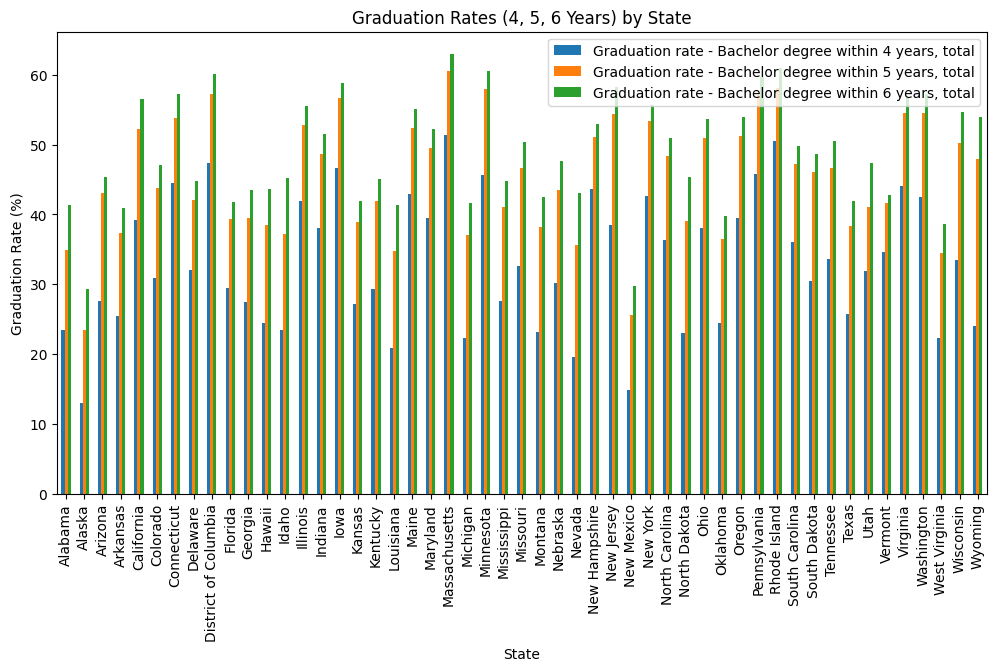

In [8]:
# Graduation rates for 4, 5, and 6 years by state
state_grouped[['Graduation rate - Bachelor degree within 4 years, total',
               'Graduation rate - Bachelor degree within 5 years, total',
               'Graduation rate - Bachelor degree within 6 years, total']].plot(kind='bar', figsize=(12,6))
plt.xlabel('State')
plt.ylabel('Graduation Rate (%)')
plt.title('Graduation Rates (4, 5, 6 Years) by State')
plt.show()

In [9]:
# Group by 'Sector of institution' and calculate sums
sector_grouped = df_filtered.groupby('Sector of institution').agg({
    'Applicants total': 'sum',
    'Admissions total': 'sum',
    'Enrolled total': 'sum',
    "Bachelor's degrees awarded": 'sum',
    'Graduation rate - Bachelor degree within 4 years, total': 'mean',
    'Graduation rate - Bachelor degree within 5 years, total': 'mean',
    'Graduation rate - Bachelor degree within 6 years, total': 'mean'
})

sector_grouped.head()

,Applicants total,Admissions total,Enrolled total,Bachelor's degrees awarded,"Graduation rate - Bachelor degree within 4 years, total","Graduation rate - Bachelor degree within 5 years, total","Graduation rate - Bachelor degree within 6 years, total"
Sector of institution,,,,,,,
"Private not-for-profit, 4-year or above",3932271.0,1969838.0,467960.0,501780.0,42.161689,51.444902,53.625129
"Public, 4-year or above",4868402.0,2925232.0,968315.0,1138164.0,25.467140,41.802842,46.957371


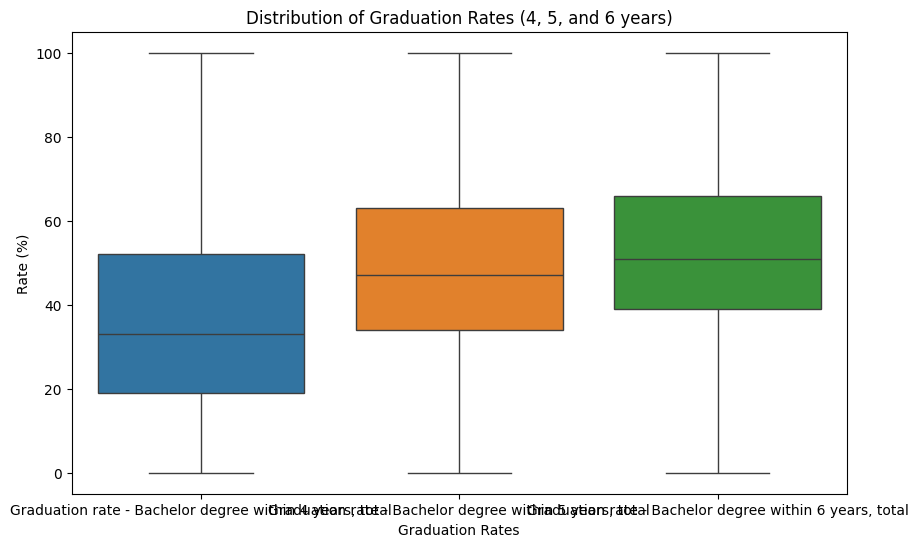

In [10]:
# Plot box plot for graduation rates
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_filtered[['Graduation rate - Bachelor degree within 4 years, total',
                              'Graduation rate - Bachelor degree within 5 years, total',
                              'Graduation rate - Bachelor degree within 6 years, total']])

plt.title('Distribution of Graduation Rates (4, 5, and 6 years)')
plt.xlabel('Graduation Rates')
plt.ylabel('Rate (%)')
plt.show()

In [11]:
print(df['Sector of institution'].unique())

['Public, 4-year or above' 'Private not-for-profit, 4-year or above']


In [12]:
# Count public and private schools
public_schools = df['Sector of institution'].str.contains('Public').sum()
private_schools = df['Sector of institution'].str.contains('Private').sum()

print(f"Number of Public Schools: {public_schools}")
print(f"Number of Private Schools: {private_schools}")

Number of Public Schools: 563
Number of Private Schools: 971


In [13]:
print(df_filtered.columns)

Index(['Name', 'Applicants total', 'Admissions total', 'Enrolled total',
       'Percent admitted - total', 'Admissions yield - total',
       'Bachelor's degrees awarded', 'Admissions yield - total', 'State',
       'Sector of institution', 'Control of institution',
       'Undergraduate enrollment', 'Full-time undergraduate enrollment',
       'Part-time undergraduate enrollment',
       'Graduation rate - Bachelor degree within 4 years, total',
       'Graduation rate - Bachelor degree within 5 years, total',
       'Graduation rate - Bachelor degree within 6 years, total'],
      dtype='object')


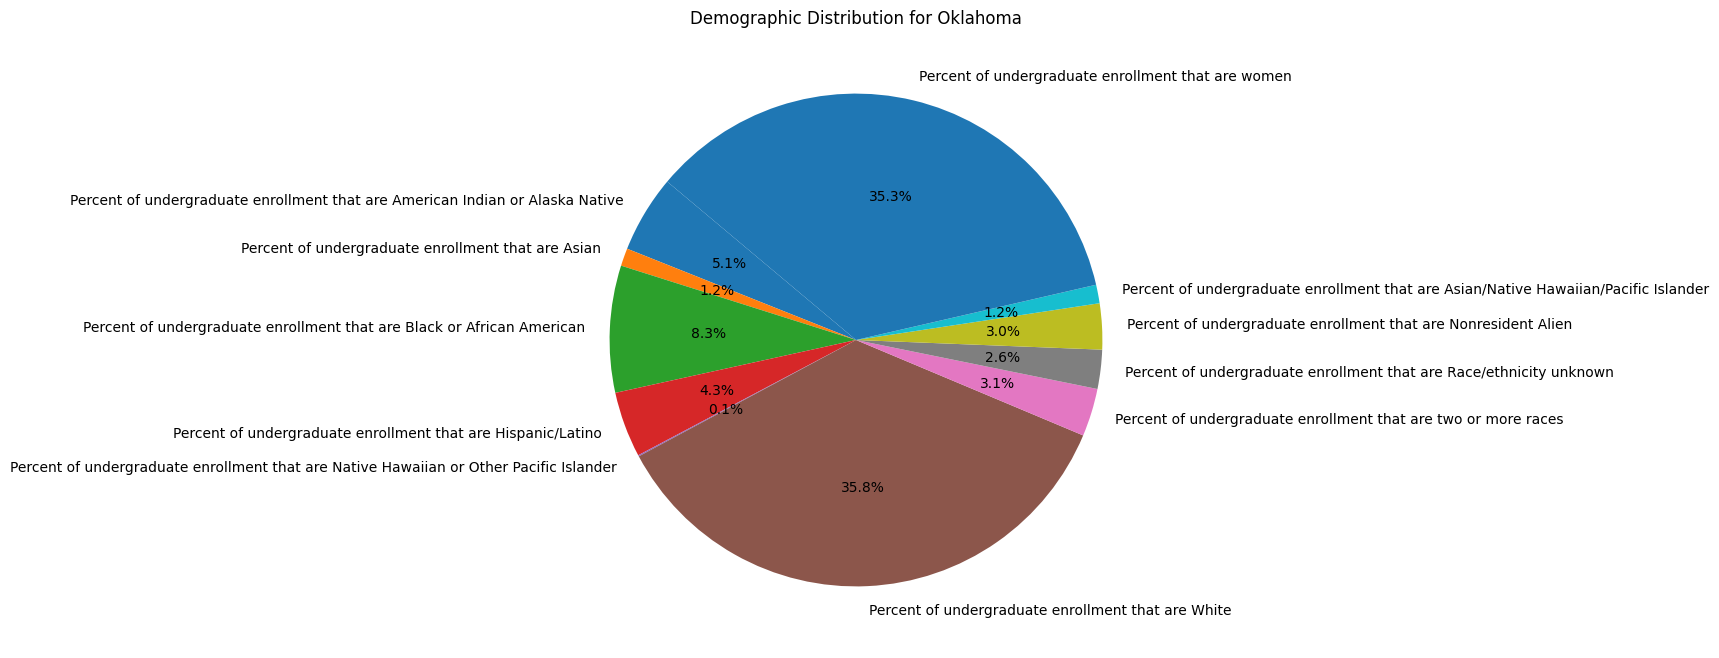

In [14]:
#PieChart of State Demographics (Random)
demographic_columns = [
    'Percent of undergraduate enrollment that are American Indian or Alaska Native',
    'Percent of undergraduate enrollment that are Asian',
    'Percent of undergraduate enrollment that are Black or African American',
    'Percent of undergraduate enrollment that are Hispanic/Latino',
    'Percent of undergraduate enrollment that are Native Hawaiian or Other Pacific Islander',
    'Percent of undergraduate enrollment that are White',
    'Percent of undergraduate enrollment that are two or more races',
    'Percent of undergraduate enrollment that are Race/ethnicity unknown',
    'Percent of undergraduate enrollment that are Nonresident Alien',
    'Percent of undergraduate enrollment that are Asian/Native Hawaiian/Pacific Islander',
    'Percent of undergraduate enrollment that are women'
]

unique_states = df['State'].unique()
state = random.choice(unique_states)
state_data = df[df['State'] == state]
state_demographics = state_data[demographic_columns].mean()
plt.figure(figsize=(10, 8))
plt.pie(state_demographics, labels=state_demographics.index, autopct='%1.1f%%', startangle=140)
plt.title(f'Demographic Distribution for {state}')
plt.show()

Enter the Name of a State: Florida


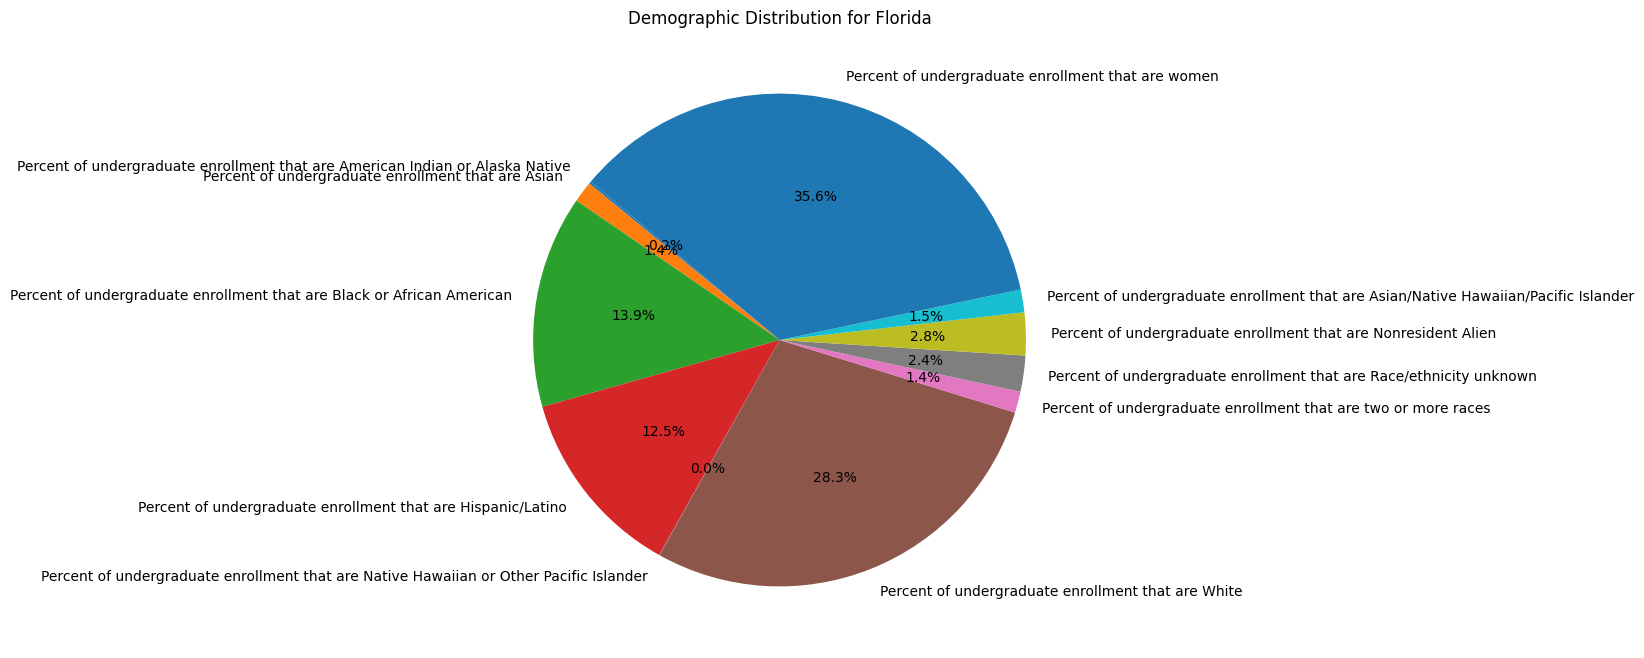

In [15]:
#PieChart of State Demographics (Select Input)
demographic_columns = [
    'Percent of undergraduate enrollment that are American Indian or Alaska Native',
    'Percent of undergraduate enrollment that are Asian',
    'Percent of undergraduate enrollment that are Black or African American',
    'Percent of undergraduate enrollment that are Hispanic/Latino',
    'Percent of undergraduate enrollment that are Native Hawaiian or Other Pacific Islander',
    'Percent of undergraduate enrollment that are White',
    'Percent of undergraduate enrollment that are two or more races',
    'Percent of undergraduate enrollment that are Race/ethnicity unknown',
    'Percent of undergraduate enrollment that are Nonresident Alien',
    'Percent of undergraduate enrollment that are Asian/Native Hawaiian/Pacific Islander',
    'Percent of undergraduate enrollment that are women'
]

unique_states = df['State'].unique()
selected_state = input("Enter the Name of a State: ").strip()
if selected_state in unique_states:
    state_data = df[df['State'] == selected_state]
    state_demographics = state_data[demographic_columns].mean()

    plt.figure(figsize=(10, 8))
    plt.pie(state_demographics, labels=state_demographics.index, autopct='%1.1f%%', startangle=140)
    plt.title(f'Demographic Distribution for {selected_state}')
    plt.show()
else:
    print("State not found. Please check your spelling and make sure the state name is correct.")

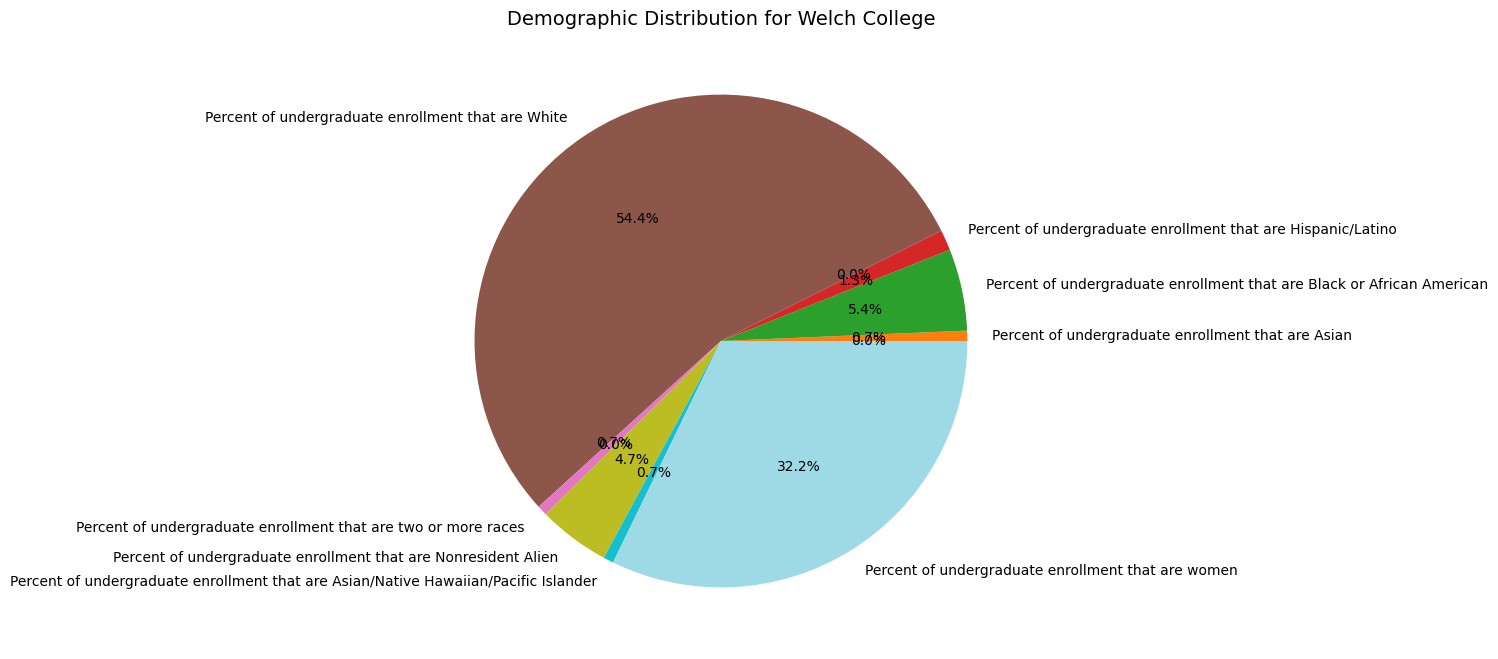

In [16]:
#Pie Chart Specific School Demographics (Random)
schools = df['Name'].unique()
selected_school = random.choice(schools)
school_data = df[df['Name'] == selected_school]

demographic_columns = [
    'Percent of undergraduate enrollment that are American Indian or Alaska Native',
    'Percent of undergraduate enrollment that are Asian',
    'Percent of undergraduate enrollment that are Black or African American',
    'Percent of undergraduate enrollment that are Hispanic/Latino',
    'Percent of undergraduate enrollment that are Native Hawaiian or Other Pacific Islander',
    'Percent of undergraduate enrollment that are White',
    'Percent of undergraduate enrollment that are two or more races',
    'Percent of undergraduate enrollment that are Race/ethnicity unknown',
    'Percent of undergraduate enrollment that are Nonresident Alien',
    'Percent of undergraduate enrollment that are Asian/Native Hawaiian/Pacific Islander',
    'Percent of undergraduate enrollment that are women'
]

for column in demographic_columns:
    assert column in df.columns, f"{column} is not in the DataFrame"
demographics = school_data[demographic_columns].sum()
plt.figure(figsize=(10, 8))
demographics.plot(kind='pie', autopct='%1.1f%%', colormap='tab20')
plt.title(f'Demographic Distribution for {selected_school}', fontsize=14)
plt.ylabel('')
plt.show()

In [17]:
#Pie Chart Specific School Demographics (Input)
demographic_columns = [
    'Percent of undergraduate enrollment that are American Indian or Alaska Native',
    'Percent of undergraduate enrollment that are Asian',
    'Percent of undergraduate enrollment that are Black or African American',
    'Percent of undergraduate enrollment that are Hispanic/Latino',
    'Percent of undergraduate enrollment that are Native Hawaiian or Other Pacific Islander',
    'Percent of undergraduate enrollment that are White',
    'Percent of undergraduate enrollment that are two or more races',
    'Percent of undergraduate enrollment that are Race/ethnicity unknown',
    'Percent of undergraduate enrollment that are Nonresident Alien',
    'Percent of undergraduate enrollment that are Asian/Native Hawaiian/Pacific Islander',
    'Percent of undergraduate enrollment that are women'
]

schools = df['Name'].unique()
selected_school = input("Enter the Name of a School: ").strip()

if selected_school in schools:
    school_data = df[df['Name'] == selected_school]

    for column in demographic_columns:
        assert column in df.columns, f"{column} is not in the DataFrame"
    demographics = school_data[demographic_columns].sum()
    plt.figure(figsize=(10, 8))
    demographics.plot(kind='pie', autopct='%1.1f%%', colormap='tab20')
    plt.title(f'Demographic Distribution for {selected_school}', fontsize=14)
    plt.ylabel('')
    plt.show()
else:
    print("School not found. Please check your spelling and make sure the school name is correct.")

Enter the Name of a School: Lynn unviersity
School not found. Please check your spelling and make sure the school name is correct.


In [ ]:
#Region is Effected by Graduation

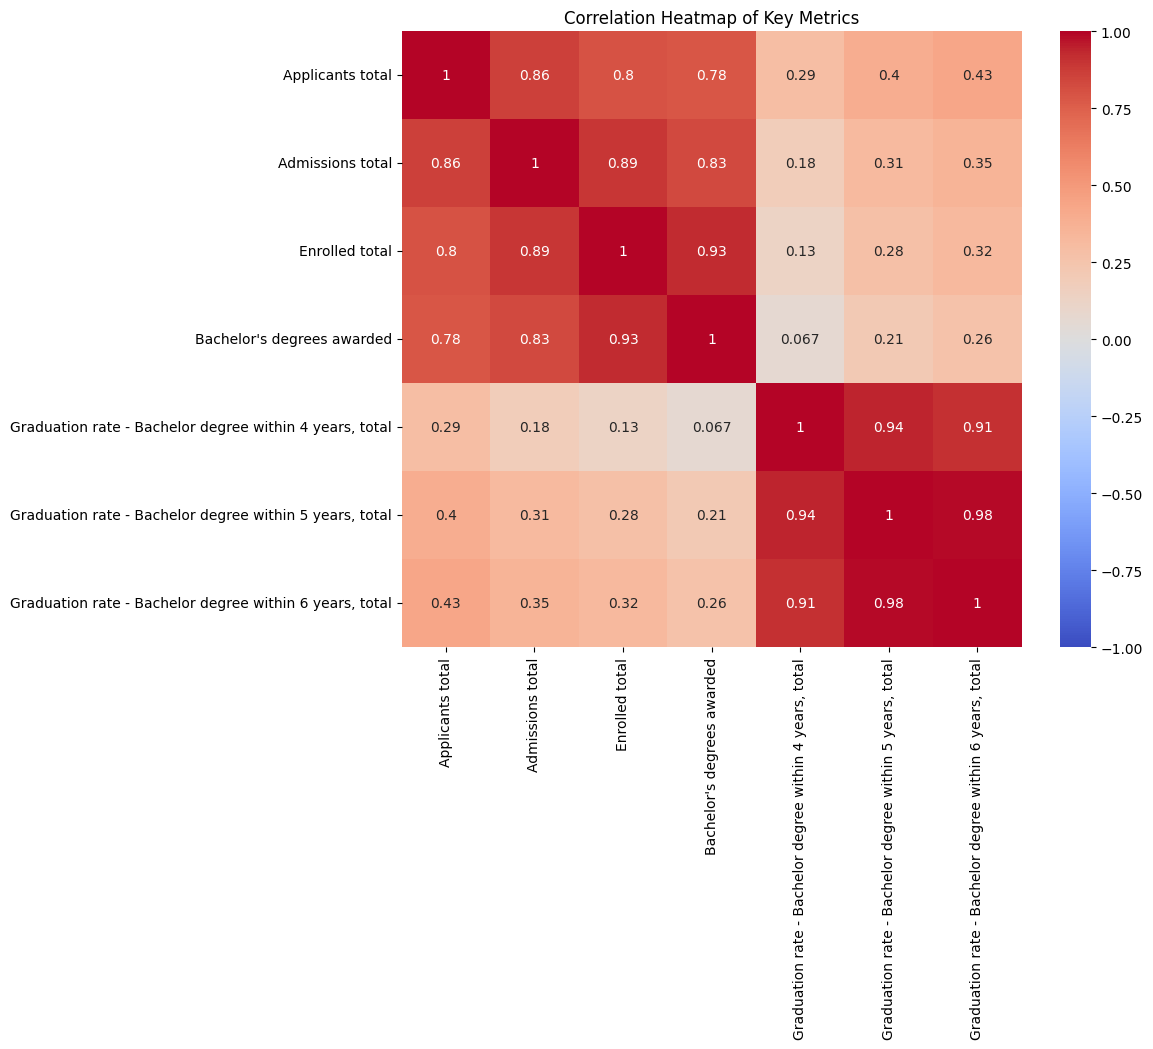

In [24]:
# Heatmap
corr = df_filtered[['Applicants total', 'Admissions total', 'Enrolled total',
                    "Bachelor's degrees awarded", 'Graduation rate - Bachelor degree within 4 years, total',
                    'Graduation rate - Bachelor degree within 5 years, total',
                    'Graduation rate - Bachelor degree within 6 years, total']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap of Key Metrics')
plt.show()

**Prediction Model**

In [25]:
# Define features and target
features = [
    'Admissions total',
    'Sector of institution',
    'State',
    'Enrolled total',
    'Percent of undergraduate enrollment that are American Indian or Alaska Native',
    'Percent of undergraduate enrollment that are Asian',
    'Percent of undergraduate enrollment that are Black or African American',
    'Percent of undergraduate enrollment that are Hispanic/Latino',
    'Percent of undergraduate enrollment that are Native Hawaiian or Other Pacific Islander',
    'Percent of undergraduate enrollment that are White',
    'Percent of undergraduate enrollment that are two or more races',
    'Percent of undergraduate enrollment that are Race/ethnicity unknown',
    'Percent of undergraduate enrollment that are Nonresident Alien',
    'Percent of undergraduate enrollment that are Asian/Native Hawaiian/Pacific Islander',
    'Percent of undergraduate enrollment that are women'
]

# Target variables for 4-year, 5-year, 6-year graduation rates
target_vars = [
    'Graduation rate - Bachelor degree within 4 years, total',
    'Graduation rate - Bachelor degree within 5 years, total',
    'Graduation rate - Bachelor degree within 6 years, total'
]

def format_output(r2, mse, target_name, y):
    # Convert R-squared to percentage
    r2_percentage = r2 * 100

    # Scaling MSE to percentage-based interpretation
    mse_percentage = (1 - (mse / (max(y) - min(y)))) * 100

    return f"{target_name}: R-squared = {r2_percentage:.2f}%, MSE-based Estimate = {mse_percentage:.2f}%"

# Prepare the data for each target
for target in target_vars:
    X = df[features]
    y = df[target]

    # Handle missing values and categorical data
    X = X.fillna(0)  # Example: Filling missing values with 0, adjust as necessary
    X = pd.get_dummies(X, columns=['Sector of institution', 'State'], drop_first=True)

    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Create and fit the model
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Evaluate the model
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Format and print the results
    output = format_output(r2, mse, target, y)
    print(output)


Graduation rate - Bachelor degree within 4 years, total: R-squared = 41.60%, MSE-based Estimate = -195.05%
Graduation rate - Bachelor degree within 5 years, total: R-squared = 39.16%, MSE-based Estimate = -188.07%
Graduation rate - Bachelor degree within 6 years, total: R-squared = 36.47%, MSE-based Estimate = -184.62%


**Extras**

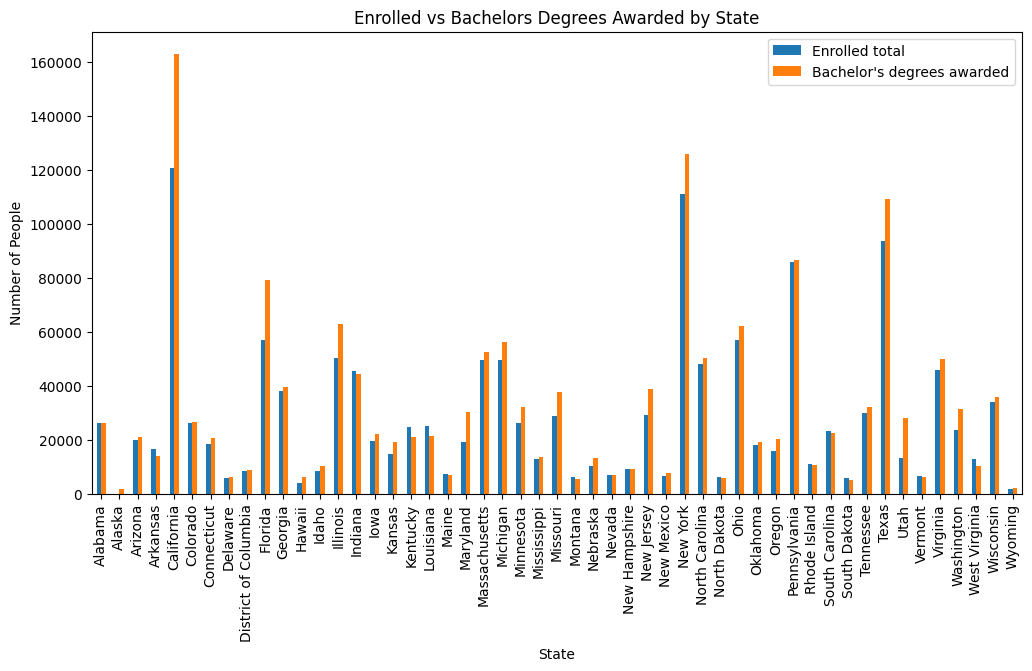

In [26]:
state_grouped[['Enrolled total', "Bachelor's degrees awarded"]].plot(kind='bar', figsize=(12,6))
plt.xlabel('State')
plt.ylabel('Number of People')
plt.title('Enrolled vs Bachelors Degrees Awarded by State')
plt.show()

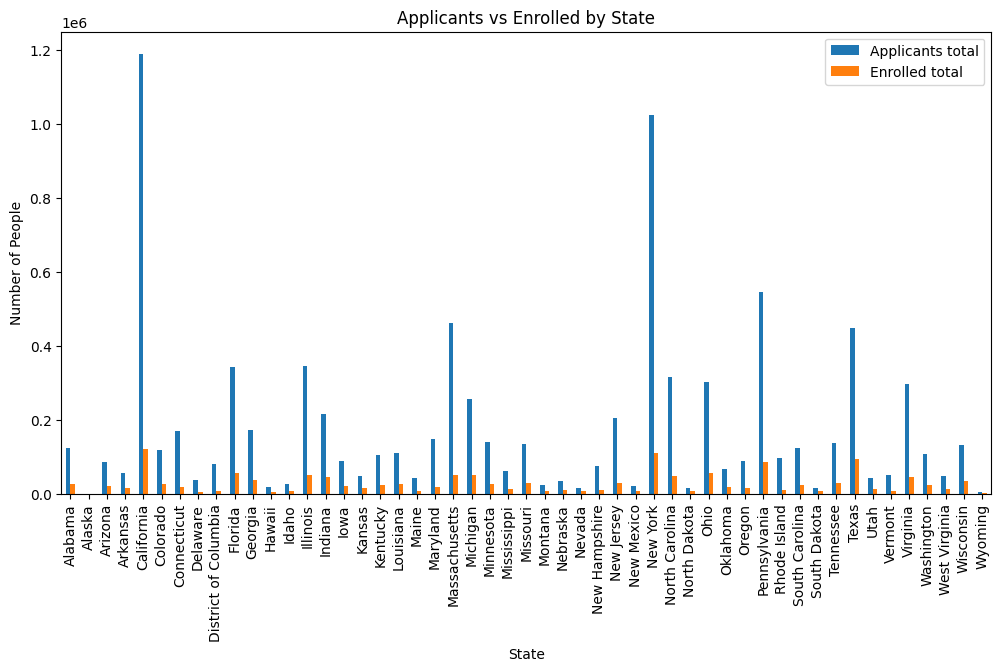

In [27]:
#Bar Chart Applicants vs Enrolled by State
state_grouped[['Applicants total', 'Enrolled total']].plot(kind='bar', figsize=(12,6))
plt.xlabel('State')
plt.ylabel('Number of People')
plt.title('Applicants vs Enrolled by State')
plt.show()

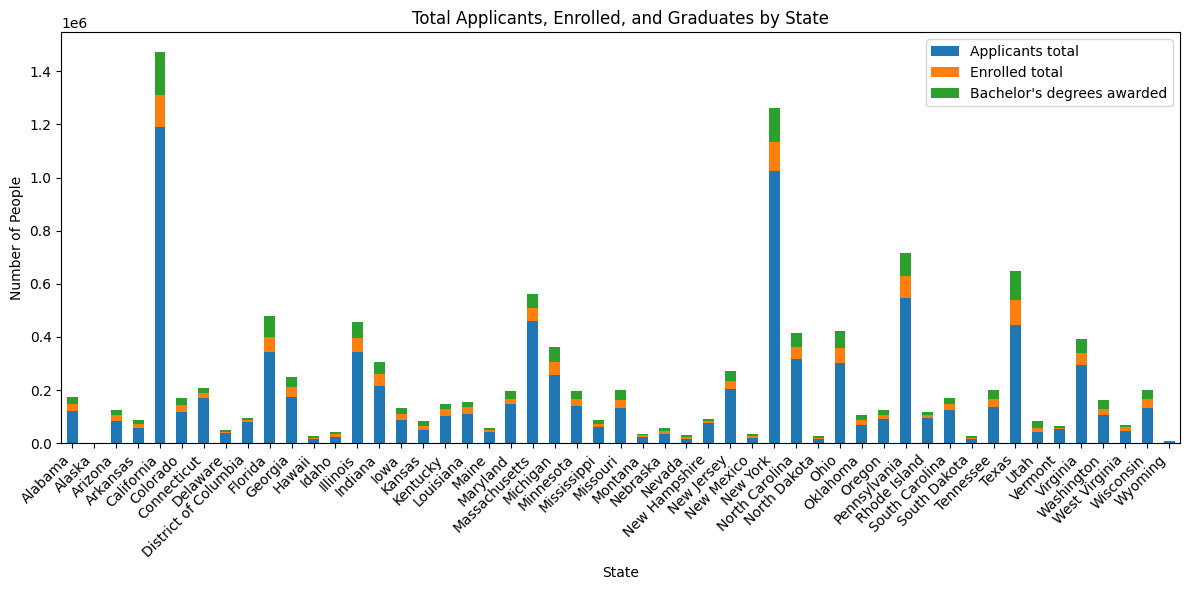

In [28]:
# Stacked Bar Chart for applicants, enrolled, and graduates
app_enr_grad = df_filtered.groupby('State')[['Applicants total', 'Enrolled total', "Bachelor's degrees awarded"]].sum()
app_enr_grad.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Total Applicants, Enrolled, and Graduates by State')
plt.xlabel('State')
plt.ylabel('Number of People')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

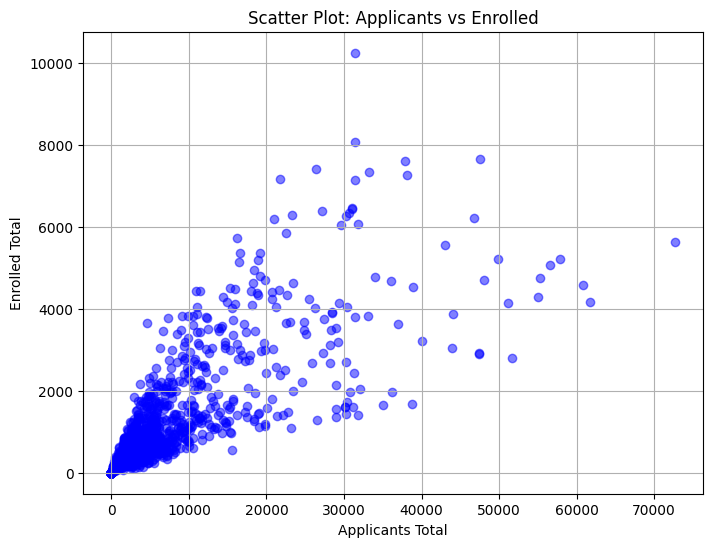

In [29]:
#Scatter Plot Applications and Enrollment
plt.figure(figsize=(8,6))
plt.scatter(df_filtered['Applicants total'], df_filtered['Enrolled total'], color='blue', alpha=0.5)
plt.grid(True)
plt.xlabel('Applicants Total')
plt.ylabel('Enrolled Total')
plt.title('Scatter Plot: Applicants vs Enrolled')
plt.show()

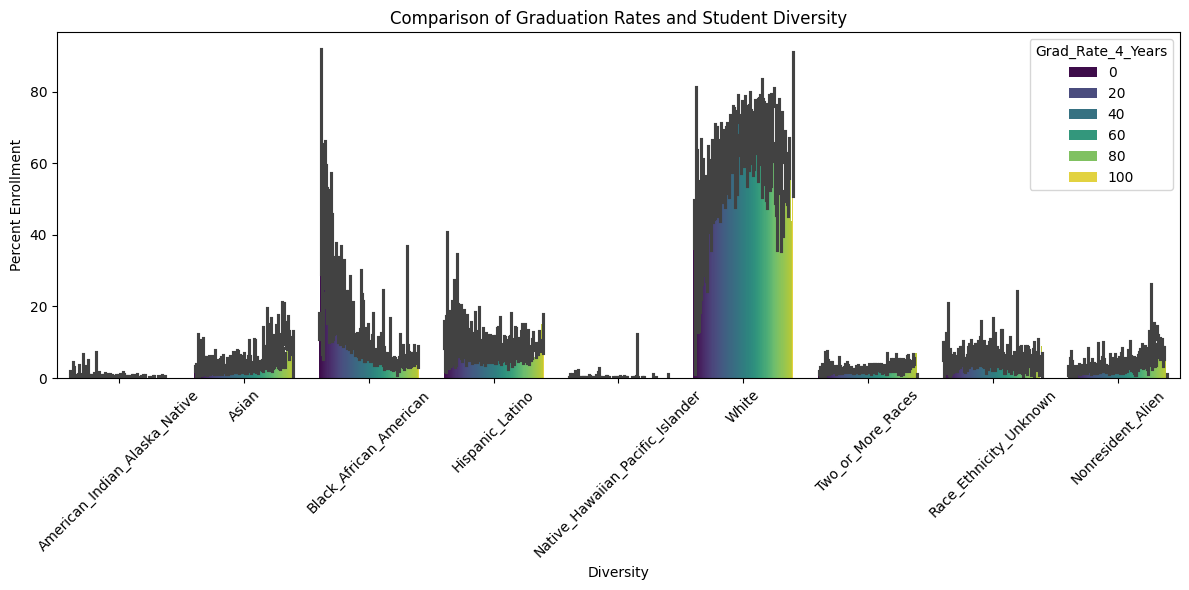

In [23]:
#Diversity and Graduation rates
df_combined = df[['Percent of undergraduate enrollment that are American Indian or Alaska Native',
                  'Percent of undergraduate enrollment that are Asian',
                  'Percent of undergraduate enrollment that are Black or African American',
                  'Percent of undergraduate enrollment that are Hispanic/Latino',
                  'Percent of undergraduate enrollment that are Native Hawaiian or Other Pacific Islander',
                  'Percent of undergraduate enrollment that are White',
                  'Percent of undergraduate enrollment that are two or more races',
                  'Percent of undergraduate enrollment that are Race/ethnicity unknown',
                  'Percent of undergraduate enrollment that are Nonresident Alien',
                  'Graduation rate - Bachelor degree within 4 years, total',
                  'Graduation rate - Bachelor degree within 5 years, total',
                  'Graduation rate - Bachelor degree within 6 years, total']]

df_combined.columns = ['American_Indian_Alaska_Native', 'Asian', 'Black_African_American', 'Hispanic_Latino',
                       'Native_Hawaiian_Pacific_Islander', 'White', 'Two_or_More_Races', 'Race_Ethnicity_Unknown',
                       'Nonresident_Alien', 'Grad_Rate_4_Years', 'Grad_Rate_5_Years', 'Grad_Rate_6_Years']

df_melted = pd.melt(df_combined,
                    id_vars=['Grad_Rate_4_Years', 'Grad_Rate_5_Years', 'Grad_Rate_6_Years'],
                    var_name='Diversity',
                    value_name='Percent_Enrollment')

plt.figure(figsize=(12, 6))
sns.barplot(x='Diversity', y='Percent_Enrollment', hue='Grad_Rate_4_Years', data=df_melted, palette='viridis')
plt.title('Comparison of Graduation Rates and Student Diversity')
plt.xlabel('Diversity')
plt.ylabel('Percent Enrollment')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()